## End-to-end machine learning problem - Part 1

### Predict if income goes above or below \\$50k/yr based on census data 

<img src="https://thelendersnetwork.com/wp-content/uploads/2017/11/what-is-annual-income-1.jpg" width=600>

### Goal: 
You are the data scientist assigned to perform the data pre-processing and preparing the data for Machine Learning algorithms. 

In this hands-on, you are only required to 
1. perform data exploration to understand the data
2. pre-processing of the data, including fix all the missing values (set the missing values to median values) and any other ones that you think are appropriate to perform.
3. prepare the test and training sets, including performing transformations. 

In the next hands-on, we will use 14 out of 15 attributes as pedictors describe below to predict if income goes above or below \\$50K/yr based on census data. `Income` will be the label. 

### Data: 
An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

### Fields:
The dataset contains 15 columns

#### Target field: Income
- The income is divide into two classes: 50K

#### Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information

- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: final weight. The number of people the census believes the entry represents.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- `salary`: >50K,<=50K

Note: "?" is used to represent missing data in this dataset.

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin


adults = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/adult.csv"

df = pd.read_csv(adults, na_values='?')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.info()

<function matplotlib.pyplot.show>

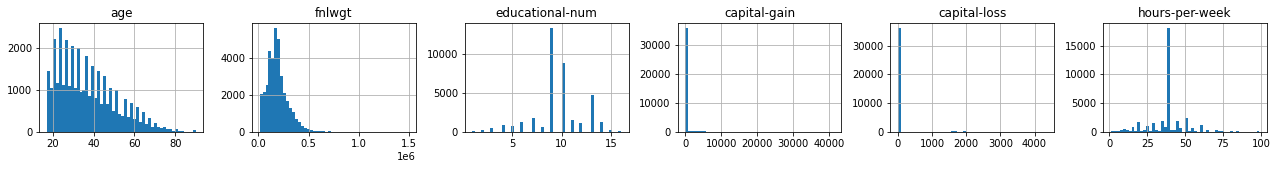

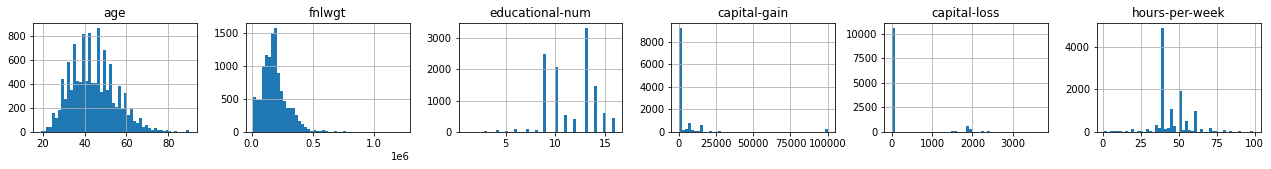

In [4]:
df[df['income'] == "<=50K"].hist(bins=50, figsize=(22,2), layout=(1,6))
df[df['income'] == ">50K"].hist(bins=50, figsize=(22,2), layout=(1,6))
plt.show

In [5]:
df = df.dropna().reset_index(drop = True)

In [6]:
df["age_cat"] = pd.cut(df['age'],
                              bins=[0, 25, 40, 50, 65, np.inf],
                              labels=[1, 2, 3, 4, 5])
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["age_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

def age_cat_proportions(data):
    return data["age_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": age_cat_proportions(df),
    "Stratified": age_cat_proportions(strat_test_set),
    "Random": age_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.186657,0.186622,0.190713,2.173058,-0.018480
2,0.400469,0.400442,0.400774,0.076188,-0.006633
3,0.220910,0.220896,0.223881,1.344628,-0.006633
4,0.162244,0.162300,0.152018,-6.303067,0.034252
5,0.029720,0.029740,0.032615,9.739744,0.067766


In [ ]:
cat_vars = ['workclass', 'education', 'marital-status', 'occupation',	'relationship',	'race',	'gender','native-country']

for cat_var in cat_vars:
  print(df[cat_var].value_counts(),'\n')
  #df = df.dropna().reset_index(drop = True)

In [8]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("age_cat", axis=1, inplace=True)

strat_train_set.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
6714,58,Self-emp-not-inc,127539,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,2407,0,25,United-States,<=50K
3871,36,Private,250224,HS-grad,9,Married-civ-spouse,Craft-repair,Own-child,Black,Female,0,0,40,United-States,<=50K
24244,31,Self-emp-inc,49923,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
20681,60,Private,187124,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
44667,36,Self-emp-inc,102729,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,70,United-States,<=50K


In [9]:
df = strat_train_set.drop('income',axis= 1)
df_labels = strat_train_set['income'].copy()

In [10]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [11]:
num_vars = [var for var in list(df) if var not in cat_vars]
gain_idx, loss_idx, hours_idx = [list(df.columns).index(col) for col in ('capital-gain',	'capital-loss',	'hours-per-week')]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_capital_per_hpw = True): # no *args or **kwargs
        self.add_capital_per_hpw = add_capital_per_hpw
        
    def fit(self, X, y=None):
        return self 

     
    def transform(self, X, y= None):
      capital_net = X[:, gain_idx] - X[:, loss_idx]
      if self.add_capital_per_hpw:
          capital_per_hpw = capital_net / X[:, hours_idx]
          return np.c_[X, capital_net, capital_per_hpw]
      else:
          return np.c_[X, capital_net]
           
attr_adder = CombinedAttributesAdder()
df_extra_attribs = attr_adder.transform(df.values)
df_extra_attribs = pd.DataFrame(df_extra_attribs, columns = list(df.columns) + ['capital-net', 'capital-per-hpw'], index = df.index)
df_extra_attribs

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,capital-net,capital-per-hpw
6714,58,Self-emp-not-inc,127539,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,2407,0,25,United-States,2407,96.28
3871,36,Private,250224,HS-grad,9,Married-civ-spouse,Craft-repair,Own-child,Black,Female,0,0,40,United-States,0,0
24244,31,Self-emp-inc,49923,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,0,0
20681,60,Private,187124,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0,0
44667,36,Self-emp-inc,102729,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,70,United-States,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42302,42,Private,344572,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,0,0
21288,63,Private,273010,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,3471,0,40,United-States,3471,86.775
10626,30,Private,92531,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0,0
6356,61,Federal-gov,294466,Some-college,10,Divorced,Adm-clerical,Not-in-family,Black,Female,0,0,40,United-States,0,0


In [12]:
gain_idx, loss_idx, hours_idx = [num_vars.index(col) for col in ('capital-gain',	'capital-loss',	'hours-per-week')]

num_pipeline = Pipeline(steps =[('imputer', SimpleImputer(missing_values=np.nan, strategy="median")), 
                                ('attribs_adder', CombinedAttributesAdder()),
                                ('std_scaler', StandardScaler()),])

#print(df.info())
#full_pipeline = ColumnTransformer([
#                                  ('num', num_pipeline, num_vars),
 #                                  ('cat', OneHotEncoder, cat_vars),])
#new_df = full_pipeline.fit_transform(df)
#new_df

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_vars),
        ("cat", OneHotEncoder(), cat_vars),
    ])

new_df = full_pipeline.fit_transform(df)
new_df

<36177x106 sparse matrix of type '<class 'numpy.float64'>'
	with 578832 stored elements in Compressed Sparse Row format>